In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 데이터 전처리
## 데이터의 개수 확인
- normal    : 8851
- bacteria  : 2530
- virus     : 1345
- covid     : 3709 
## 데이터의 shape 확인
- 지금 사용하는 데이터의 경우 이미지이므로, shape을 확인해야한다. shape이 다를경우엔 padding이나 resize 등을 통해 shape을 맞춰줘야 한다.
- normal data의 size가 (1024, 1024) 로 고정 되어있는 것을 제외하고 나머지 데이터는 모두 shape이 다 달랐다.

In [2]:
import cv2
import os
data_path = "C:\\Users\\Owner6\\workspace\\dataset\\COVID19\\new_data"

normal_dir = os.path.join(data_path, "normal")
normal_list = os.listdir(normal_dir)

bacteria_dir = os.path.join(data_path, "bacteria")
bacteria_list = os.listdir(bacteria_dir)

virus_dir = os.path.join(data_path, "virus")
virus_list = os.listdir(virus_dir)

covid_dir = os.path.join(data_path, "covid")
covid_list = os.listdir(covid_dir)

print('normal :', len(normal_list), ', bacteria :', len(bacteria_list), ', virus :', len(virus_list), ', covid :', len(covid_list))

normal : 8851 , bacteria : 2530 , virus : 1345 , covid : 3709


In [3]:
# 각 이미지 shape 확인
print("-----normal-----")
for i in normal_list[:5]:
    img = cv2.imread(os.path.join(normal_dir, i))
    print(f'img shape : {img.shape}')
print("-----bacteria-----")
for i in bacteria_list[:5]:
    img = cv2.imread(os.path.join(bacteria_dir, i))
    print(f'img shape : {img.shape}')
print("-----virus-----")
for i in virus_list[:5]:
    img = cv2.imread(os.path.join(virus_dir, i))
    print(f'img shape : {img.shape}')        
print("-----covid-----")
for i in covid_list[:5]:
    img = cv2.imread(os.path.join(covid_dir, i))
    print(f'img shape : {img.shape}')

-----normal-----
img shape : (1024, 1024, 3)
img shape : (1024, 1024, 3)
img shape : (1024, 1024, 3)
img shape : (1024, 1024, 3)
img shape : (1024, 1024, 3)
-----bacteria-----
img shape : (760, 1152, 3)
img shape : (863, 1244, 3)
img shape : (940, 1242, 3)
img shape : (1280, 1488, 3)
img shape : (816, 1184, 3)
-----virus-----
img shape : (768, 1072, 3)
img shape : (616, 1008, 3)
img shape : (480, 856, 3)
img shape : (792, 1216, 3)
img shape : (664, 1048, 3)
-----covid-----
img shape : (972, 1151, 3)
img shape : (973, 1050, 3)
img shape : (4032, 3024, 3)
img shape : (1794, 1772, 3)
img shape : (2004, 1980, 3)


In [4]:
# 행, 열 최대 길이 확인
max_h_n = 0
max_w_n = 0
max_h_b = 0
max_w_b = 0
max_h_v = 0
max_w_v = 0
max_h_c = 0
max_w_c = 0

print("-----normal-----")
for i in normal_list:
    img = cv2.imread(os.path.join(normal_dir, i))
    h, w, c = img.shape
    if h > max_h_n:
        max_h_n = h
    if w > max_w_n:
        max_w_n = w
print(max_h_n, max_w_n)
print("-----bacteria-----")
for i in bacteria_list:
    img = cv2.imread(os.path.join(bacteria_dir, i))
    h, w, c = img.shape
    if h > max_h_b:
        max_h_b = h
    if w > max_w_b:
        max_w_b = w
print(max_h_b, max_w_b)
print("-----virus-----")
for i in virus_list:
    img = cv2.imread(os.path.join(virus_dir, i))
    h, w, c = img.shape
    if h > max_h_v:
        max_h_v = h
    if w > max_w_v:
        max_w_v = w
print(max_h_v, max_w_v)
print("-----covid-----")
for i in covid_list:
    img = cv2.imread(os.path.join(covid_dir, i))
    h, w, c = img.shape
    if h > max_h_c:
        max_h_c = h
    if w > max_w_c:
        max_w_c = w
print(max_h_c, max_w_c)

-----normal-----
1024 1024
-----bacteria-----
2272 2772
-----virus-----
2304 2309
-----covid-----
4032 3052


In [5]:
# 데이터 grayscale로 불러오고, (1024, 1024)로 resize, label 생성
# normal : 0, bacteria : 1, virus : 2, covid : 3
normal_data = []
normal_y = []
bacteria_data = []
bacteria_y = []
virus_data = []
virus_y = []
covid_data = []
covid_y = []
print("-----normal-----")
for i in normal_list:
    img = cv2.imread(os.path.join(normal_dir, i), cv2.IMREAD_GRAYSCALE)
    normal_data.append(img)
    normal_y.append(0)
normal_data = np.array(normal_data)
normal_y = np.array(normal_y)
print(normal_data.shape, normal_y.shape)

print("-----bacteria-----")
for i in bacteria_list:
    img = cv2.imread(os.path.join(bacteria_dir, i), cv2.IMREAD_GRAYSCALE)
    img2 = cv2.resize(img, dsize=(1024, 1024))
    bacteria_data.append(img2)
    bacteria_y.append(1)
bacteria_data = np.array(bacteria_data)
bacteria_y = np.array(bacteria_y)
print(bacteria_data.shape, bacteria_y.shape)

print("-----virus-----")
for i in virus_list:
    img = cv2.imread(os.path.join(virus_dir, i), cv2.IMREAD_GRAYSCALE)
    img2 = cv2.resize(img, dsize=(1024, 1024))
    virus_data.append(img2)
    virus_y.append(2)
virus_data = np.array(virus_data)
virus_y = np.array(virus_y)
print(virus_data.shape, virus_y.shape)

print("-----covid-----")
for i in covid_list:
    img = cv2.imread(os.path.join(covid_dir, i), cv2.IMREAD_GRAYSCALE)
    img2 = cv2.resize(img, dsize=(1024, 1024))
    covid_data.append(img2)
    covid_y.append(3)
covid_data = np.array(covid_data)
covid_y = np.array(covid_y)
print(covid_data.shape, covid_y.shape)

-----normal-----
(8851, 1024, 1024) (8851,)
-----bacteria-----
(2530, 1024, 1024) (2530,)
-----virus-----
(1345, 1024, 1024) (1345,)
-----covid-----
(3709, 1024, 1024) (3709,)


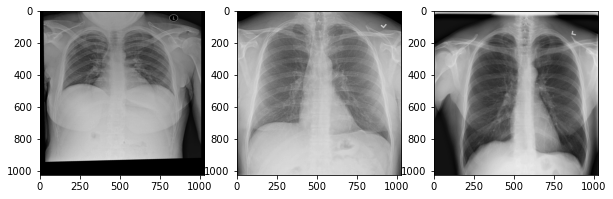

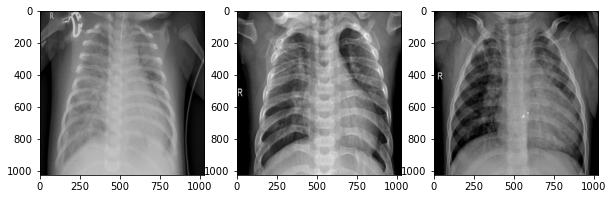

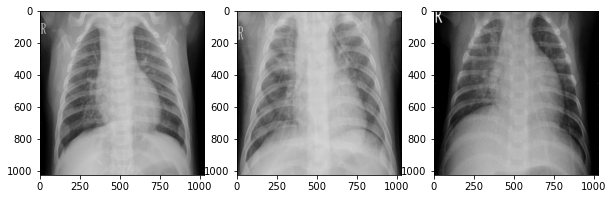

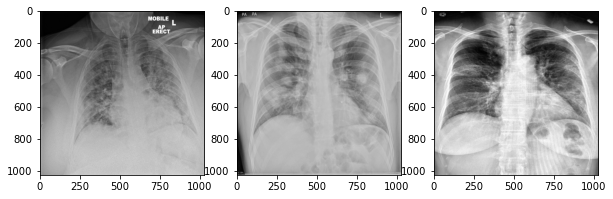

In [6]:
# 불러온 사진 확인
plt.figure(figsize=(10,5))
for idx, img in enumerate(normal_data[:3]):
    plt.subplot(1,3,idx+1)
    plt.imshow(img, cmap='gray')
plt.figure(figsize=(10,5))
for idx, img in enumerate(bacteria_data[:3]):
    plt.subplot(1,3,idx+1)
    plt.imshow(img, cmap='gray')
plt.figure(figsize=(10,5))
for idx, img in enumerate(virus_data[:3]):
    plt.subplot(1,3,idx+1)
    plt.imshow(img, cmap='gray')
plt.figure(figsize=(10,5))
for idx, img in enumerate(covid_data[:3]):
    plt.subplot(1,3,idx+1)
    plt.imshow(img, cmap='gray')
plt.show()

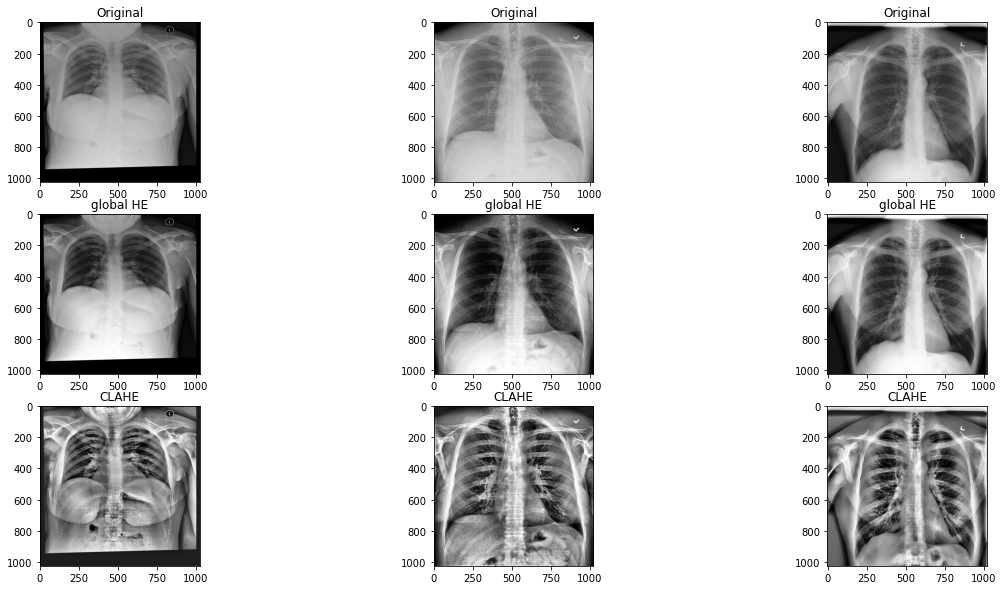

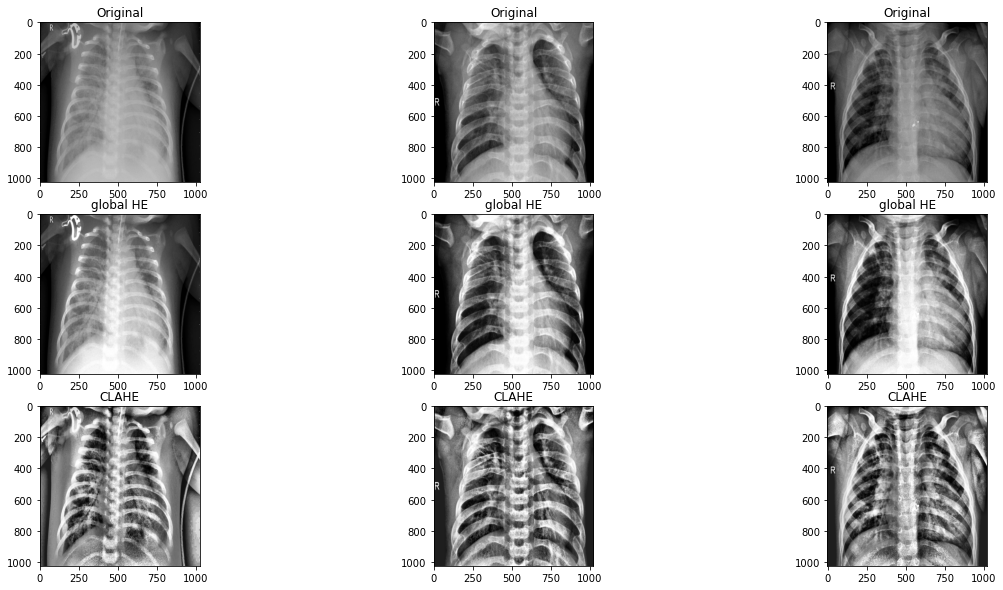

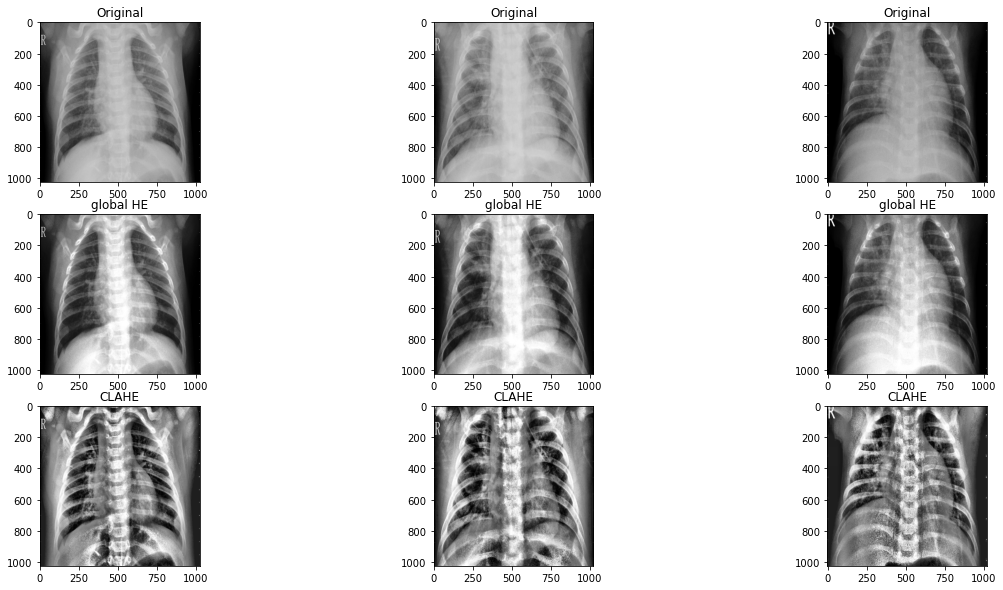

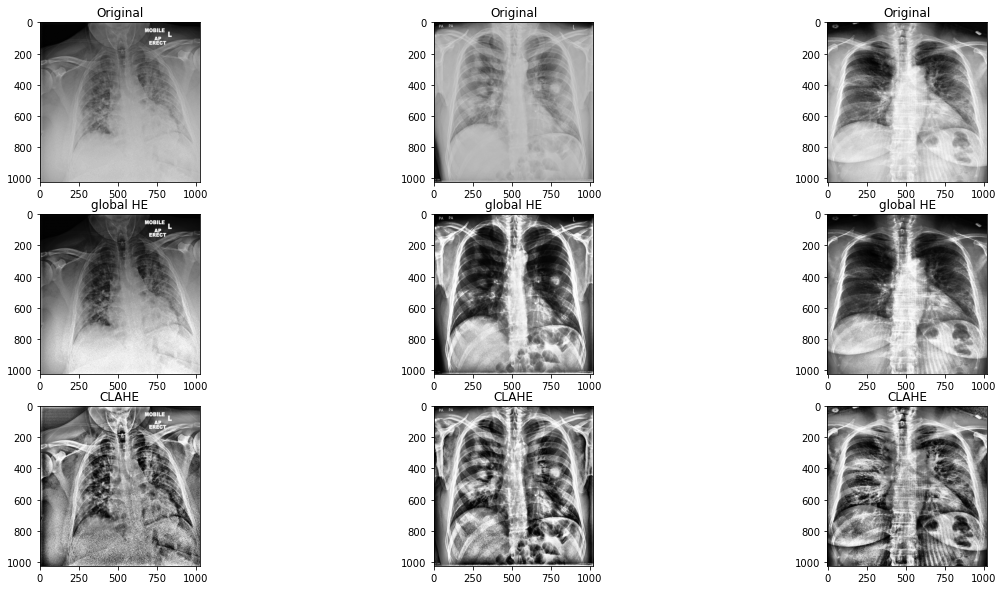

In [7]:
# 원본사진, Global Histogram Equalization, Clahe 처리 후 사진 비교
clahe = cv2.createCLAHE(clipLimit=30.0, tileGridSize=(8,8))
w, h = 20, 10
plt.figure(figsize=(w,h))
for idx, img in enumerate(normal_data[:3]):
    img2 = cv2.equalizeHist(img)
    img3 = clahe.apply(img)
    plt.subplot(3,3,idx+1)
    plt.imshow(img, cmap='gray')
    plt.title('Original')
    plt.subplot(3,3,idx+4)
    plt.imshow(img2, cmap='gray')
    plt.title("global HE")
    plt.subplot(3,3,idx+7)
    plt.imshow(img3, cmap='gray')
    plt.title('CLAHE')
plt.figure(figsize=(w,h))
for idx, img in enumerate(bacteria_data[:3]):
    img2 = cv2.equalizeHist(img)
    img3 = clahe.apply(img)
    plt.subplot(3,3,idx+1)
    plt.imshow(img, cmap='gray')
    plt.title('Original')
    plt.subplot(3,3,idx+4)
    plt.imshow(img2, cmap='gray')
    plt.title("global HE")
    plt.subplot(3,3,idx+7)
    plt.imshow(img3, cmap='gray')
    plt.title('CLAHE')
plt.figure(figsize=(w,h))
for idx, img in enumerate(virus_data[:3]):
    img2 = cv2.equalizeHist(img)
    img3 = clahe.apply(img)
    plt.subplot(3,3,idx+1)
    plt.imshow(img, cmap='gray')
    plt.title('Original')
    plt.subplot(3,3,idx+4)
    plt.imshow(img2, cmap='gray')
    plt.title("global HE")
    plt.subplot(3,3,idx+7)
    plt.imshow(img3, cmap='gray')
    plt.title('CLAHE')
plt.figure(figsize=(w,h))
for idx, img in enumerate(covid_data[:3]):
    img2 = cv2.equalizeHist(img)
    img3 = clahe.apply(img)
    plt.subplot(3,3,idx+1)
    plt.imshow(img, cmap='gray')
    plt.title('Original')
    plt.subplot(3,3,idx+4)
    plt.imshow(img2, cmap='gray')
    plt.title("global HE")
    plt.subplot(3,3,idx+7)
    plt.imshow(img3, cmap='gray')
    plt.title('CLAHE')
plt.show()